In [123]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import requests

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 20)

## Fetch Data

### Standing

In [126]:
url = "http://api.football-data.org/v4/competitions/SA/standings"
headers = {"X-Auth-Token": ""}

In [124]:
response = requests.get(url, headers=headers)

data = response.json()

data = data['standings'][0]['table']

standing = pd.DataFrame(data)

# Extract the 'shortName' value from the 'team' dictionary
standing['team_short_name'] = standing['team'].apply(lambda x: x['shortName'])

# Drop the 'team' column
standing.drop(columns=['team'], inplace=True)

standing

,position,playedGames,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name
0,1,27,None,23,2,2,71,64,16,48,Napoli
1,2,27,None,15,7,5,52,42,19,23,Lazio
2,3,27,None,16,2,9,50,47,31,16,Inter
3,4,27,None,14,6,7,48,44,36,8,Milan
4,5,27,None,14,5,8,47,35,26,9,Roma
5,6,27,None,13,6,8,45,44,31,13,Atalanta
6,7,27,None,17,5,5,41,45,22,23,Juventus
7,8,27,None,9,11,7,38,37,31,6,Udinese
8,9,27,None,10,7,10,37,32,31,1,Fiorentina
9,10,27,None,10,7,10,37,33,36,-3,Bologna


#### Data Addition

In [143]:
n_groups = 3

In [144]:
standing['team_group'] = standing.position.apply(lambda x: int(((x-1)/(20/n_groups))))
standing

,position,playedGames,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group
0,1,27,None,23,2,2,71,64,16,48,Napoli,0
1,2,27,None,15,7,5,52,42,19,23,Lazio,0
2,3,27,None,16,2,9,50,47,31,16,Inter,0
3,4,27,None,14,6,7,48,44,36,8,Milan,0
4,5,27,None,14,5,8,47,35,26,9,Roma,0
5,6,27,None,13,6,8,45,44,31,13,Atalanta,0
6,7,27,None,17,5,5,41,45,22,23,Juventus,0
7,8,27,None,9,11,7,38,37,31,6,Udinese,1
8,9,27,None,10,7,10,37,32,31,1,Fiorentina,1
9,10,27,None,10,7,10,37,33,36,-3,Bologna,1


### Results

In [145]:
url = "https://www.football-data.co.uk/mmz4281/2223/I1.csv"
response = requests.get(url)
file_path = './Serie_A_2022_2023.csv'

with open(file_path, "wb") as f:
    f.write(response.content)

## Analysis

In [146]:
df = pd.read_csv(file_path)
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,13/08/2022,17:30,Milan,Udinese,4,2,H,2,2,...,2.16,-1.25,1.98,1.92,2.02,1.91,2.17,1.94,2.06,1.81
1,I1,13/08/2022,17:30,Sampdoria,Atalanta,0,2,A,0,1,...,2.24,0.75,2.07,1.83,2.11,1.82,2.13,1.87,2.06,1.82
2,I1,13/08/2022,19:45,Lecce,Inter,1,2,A,0,1,...,2.55,1.50,1.90,2.00,1.91,2.02,1.96,2.06,1.89,1.97
3,I1,13/08/2022,19:45,Monza,Torino,1,2,A,0,1,...,1.75,0.00,1.79,2.11,1.80,2.15,1.88,2.16,1.83,2.06
4,I1,14/08/2022,17:30,Fiorentina,Cremonese,3,2,H,2,1,...,2.09,-1.00,2.02,1.88,2.06,1.87,2.07,1.97,1.99,1.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,I1,19/03/2023,11:30,Sampdoria,Verona,3,1,H,2,0,...,1.54,0.00,2.14,1.77,2.17,1.79,2.17,1.85,2.08,1.81
266,I1,19/03/2023,14:00,Fiorentina,Lecce,1,0,H,1,0,...,1.70,-1.00,2.02,1.77,2.13,1.80,2.16,1.87,2.07,1.81
267,I1,19/03/2023,14:00,Torino,Napoli,0,4,A,0,2,...,1.62,0.75,1.82,2.08,1.85,2.08,1.90,2.22,1.81,2.07
268,I1,19/03/2023,17:00,Lazio,Roma,1,0,H,0,0,...,1.41,0.00,2.08,1.82,2.11,1.83,2.13,1.85,2.08,1.81


### Add giornata

In [147]:
df.loc[(df.HomeTeam == 'Empoli') & (df.AwayTeam == 'Cremonese'),'Date'] = '12/11/2022'
df['year'] = pd.to_datetime(df.Date, format='%d/%m/%Y').dt.year
df['month'] = pd.to_datetime(df.Date,format='%d/%m/%Y').dt.month
df['day'] = pd.to_datetime(df.Date,format='%d/%m/%Y').dt.day
df['week'] = pd.to_datetime(df.Date,format='%d/%m/%Y').dt.isocalendar().week
df['weekday'] = pd.to_datetime(df.Date,format='%d/%m/%Y').dt.weekday

In [148]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,year,month,day,week,weekday
0,I1,13/08/2022,17:30,Milan,Udinese,4,2,H,2,2,...,1.91,2.17,1.94,2.06,1.81,2022,8,13,32,5
1,I1,13/08/2022,17:30,Sampdoria,Atalanta,0,2,A,0,1,...,1.82,2.13,1.87,2.06,1.82,2022,8,13,32,5
2,I1,13/08/2022,19:45,Lecce,Inter,1,2,A,0,1,...,2.02,1.96,2.06,1.89,1.97,2022,8,13,32,5
3,I1,13/08/2022,19:45,Monza,Torino,1,2,A,0,1,...,2.15,1.88,2.16,1.83,2.06,2022,8,13,32,5
4,I1,14/08/2022,17:30,Fiorentina,Cremonese,3,2,H,2,1,...,1.87,2.07,1.97,1.99,1.87,2022,8,14,32,6


In [149]:
df['FTG'] = df['FTHG'] + df['FTAG']

In [150]:
df = df.sort_values(['year', 'month', 'day'])

# Assign sequential week numbers to blocks of days from Thursday to Wednesday
giornata = 1
curr_day = (2020,1,1,-1,-1)
infrasettimanale = False
for i, row in df.iterrows():
    if row['week'] != curr_day[3] and abs(curr_day[4] - row['weekday']) < 6: 
        giornata += 1
    if row['week'] == curr_day[3] and abs(curr_day[4] - row['weekday']) > 1: 
        giornata += 1
    curr_day = (row['year'], row['month'], row['day'], row['week'], row['weekday'])
    df.at[i, 'giornata'] = giornata

In [151]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxCAHA,AvgCAHH,AvgCAHA,year,month,day,week,weekday,FTG,giornata
0,I1,13/08/2022,17:30,Milan,Udinese,4,2,H,2,2,...,1.94,2.06,1.81,2022,8,13,32,5,6,1.0
1,I1,13/08/2022,17:30,Sampdoria,Atalanta,0,2,A,0,1,...,1.87,2.06,1.82,2022,8,13,32,5,2,1.0
2,I1,13/08/2022,19:45,Lecce,Inter,1,2,A,0,1,...,2.06,1.89,1.97,2022,8,13,32,5,3,1.0
3,I1,13/08/2022,19:45,Monza,Torino,1,2,A,0,1,...,2.16,1.83,2.06,2022,8,13,32,5,3,1.0
4,I1,14/08/2022,17:30,Fiorentina,Cremonese,3,2,H,2,1,...,1.97,1.99,1.87,2022,8,14,32,6,5,1.0


In [14]:
df.tail()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxCAHA,AvgCAHH,AvgCAHA,year,month,day,week,weekday,FTG,giornata
265,I1,19/03/2023,11:30,Sampdoria,Verona,3,1,H,2,0,...,1.85,2.08,1.81,2023,3,19,11,6,4,27.0
266,I1,19/03/2023,14:00,Fiorentina,Lecce,1,0,H,1,0,...,1.87,2.07,1.81,2023,3,19,11,6,1,27.0
267,I1,19/03/2023,14:00,Torino,Napoli,0,4,A,0,2,...,2.22,1.81,2.07,2023,3,19,11,6,4,27.0
268,I1,19/03/2023,17:00,Lazio,Roma,1,0,H,0,0,...,1.85,2.08,1.81,2023,3,19,11,6,1,27.0
269,I1,19/03/2023,19:45,Inter,Juventus,0,1,A,0,1,...,1.89,2.04,1.84,2023,3,19,11,6,1,27.0


### Plot number goals over giornate

<Axes: xlabel='giornata'>

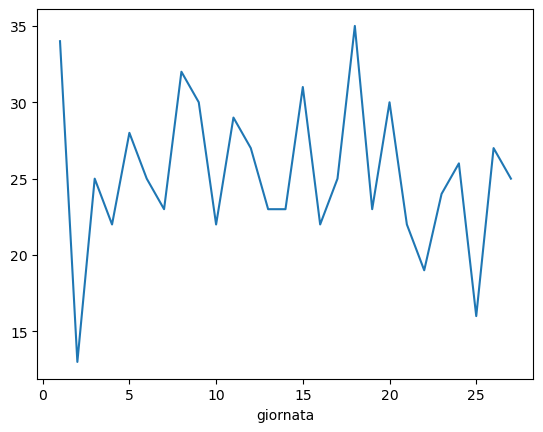

In [15]:
df[['giornata','FTG','FTHG','FTAG']].groupby(['giornata']).sum().FTG.plot()

### Goals distribution over matches in each giornata

In [16]:
df['row_num'] = df.groupby('giornata').cumcount()
boxgoals = df[['giornata','row_num','FTG','FTHG','FTAG']].pivot(index='row_num', columns='giornata', values='FTG')

<Axes: >

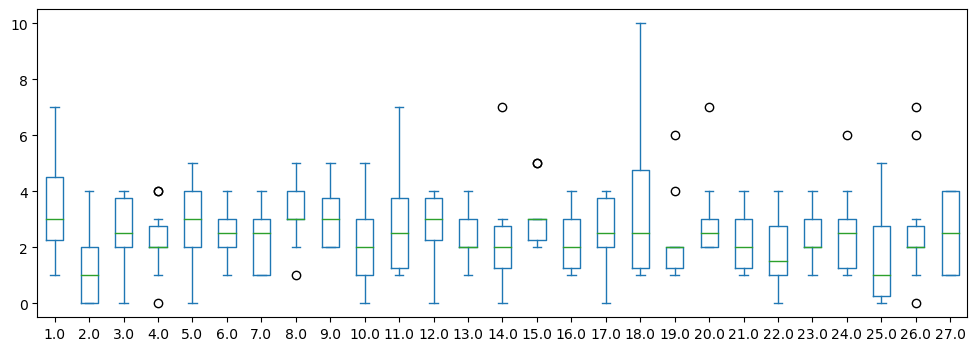

In [17]:
boxgoals.plot(kind='box', figsize=(12,4))

### Under/Over

In [63]:
df['tot_goal'] = df.FTHG + df.FTAG

/tmp/ipykernel_311/2220126172.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_uog.groupby('Team').mean().sort_values('tot_goal').plot(kind='bar',  ax=ax[0])
/tmp/ipykernel_311/2220126172.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_uog[df_uog.type=='home'].groupby('Team').mean().sort_values('tot_goal').plot(kind='bar',  ax=ax[1])
/tmp/ipykernel_311/2220126172.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the

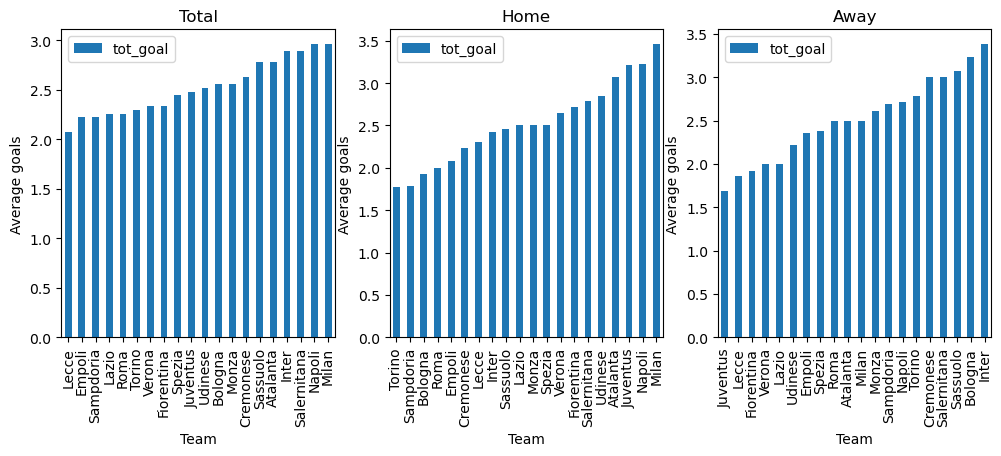

In [85]:
tt_htg = df[['HomeTeam','tot_goal']]
tt_atg = df[['AwayTeam','tot_goal']]
tt_htg.columns = ['Team','tot_goal']
tt_htg['type'] = 'home'
tt_atg.columns = ['Team','tot_goal']
tt_atg['type'] = 'away'
df_uog = pd.concat([tt_atg,tt_htg])

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
df_uog.groupby('Team').mean().sort_values('tot_goal').plot(kind='bar',  ax=ax[0])
df_uog[df_uog.type=='home'].groupby('Team').mean().sort_values('tot_goal').plot(kind='bar',  ax=ax[1])
df_uog[df_uog.type=='away'].groupby('Team').mean().sort_values('tot_goal').plot(kind='bar',  ax=ax[2])

ax[0].set_title('Total')
ax[1].set_title('Home')
ax[2].set_title('Away')
ax[0].set_ylabel('Average goals')
ax[1].set_ylabel('Average goals')
ax[2].set_ylabel('Average goals')

plt.show()

### Goal/No Goal

In [97]:
df['no_goal'] = (df.FTHG == 0) | (df.FTAG == 0)
df['goal'] = (df.FTHG != 0) & (df.FTAG != 0)
df['tot_goal'] = df.FTHG + df.FTAG
hng = df[['HomeTeam','no_goal','goal','tot_goal']]
hng.columns = ['Team','no_goal','goal','tot_goal']
hng['type'] = 'home'

In [98]:
ang = df[['AwayTeam','no_goal','goal','tot_goal']]
ang.columns = ['Team','no_goal','goal','tot_goal']
ang['type'] = 'away'

In [99]:
team_ng = pd.concat([hng,ang])

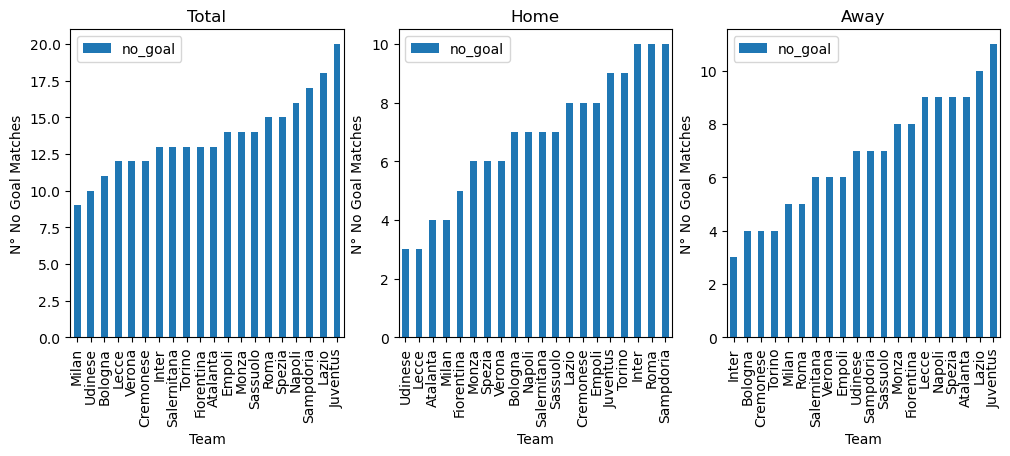

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
team_ng[['Team','no_goal']].groupby('Team').sum().sort_values('no_goal').plot(kind='bar',  ax=ax[0])
team_ng[team_ng.type=='home'][['Team','no_goal']].groupby('Team').sum().sort_values('no_goal').plot(kind='bar',  ax=ax[1])
team_ng[team_ng.type=='away'][['Team','no_goal']].groupby('Team').sum().sort_values('no_goal').plot(kind='bar',  ax=ax[2])

ax[0].set_title('Total')
ax[1].set_title('Home')
ax[2].set_title('Away')
ax[0].set_ylabel('N° No Goal Matches')
ax[1].set_ylabel('N° No Goal Matches')
ax[2].set_ylabel('N° No Goal Matches')

plt.show()

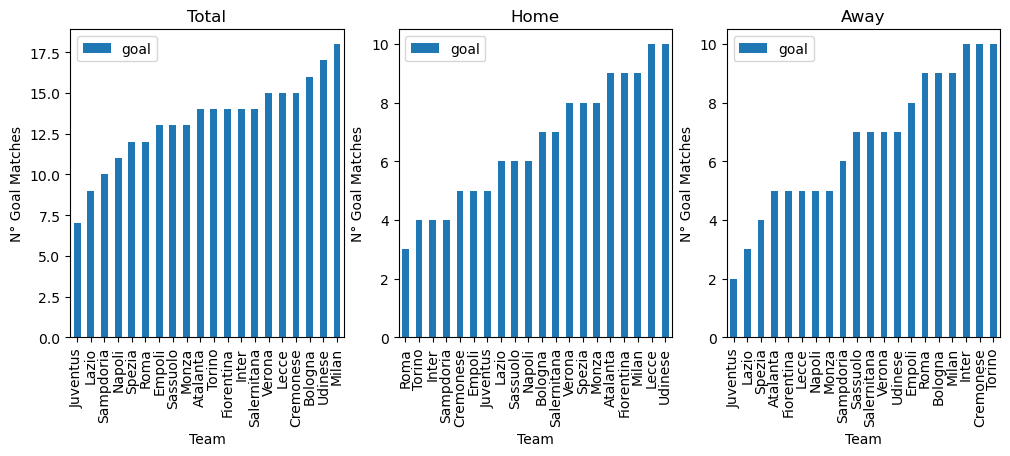

In [104]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
team_ng[['Team','goal']].groupby('Team').sum().sort_values('goal').plot(kind='bar',  ax=ax[0])
team_ng[team_ng.type=='home'][['Team','goal']].groupby('Team').sum().sort_values('goal').plot(kind='bar',  ax=ax[1])
team_ng[team_ng.type=='away'][['Team','goal']].groupby('Team').sum().sort_values('goal').plot(kind='bar',  ax=ax[2])

ax[0].set_title('Total')
ax[1].set_title('Home')
ax[2].set_title('Away')
ax[0].set_ylabel('N° Goal Matches')
ax[1].set_ylabel('N° Goal Matches')
ax[2].set_ylabel('N° Goal Matches')

plt.show()

## Match analysis

In [542]:
home_team = 'Roma'
away_team = 'Sampdoria'

In [543]:
df['no_goal'] = (df.FTHG == 0) | (df.FTAG == 0)
df['goal'] = (df.FTHG != 0) & (df.FTAG != 0)
df['tot_goals'] = df.FTHG + df.FTAG

In [544]:
def get_result(row):
    if(row['goal_fatti'] > row['goal_subiti']):
        return 'Win'
    if(row['goal_fatti'] == row['goal_subiti']):
        return 'Draw'
    return 'Loss'

#### Home Team

In [564]:
team_home_away = df[(df.AwayTeam==home_team)]
team_home_away['goal_fatti'] = team_home_away['FTAG']
team_home_away['goal_subiti'] = team_home_away['FTHG']
team_home_away['Team'] = team_home_away['AwayTeam']
team_home_away['Opponent'] = team_home_away['HomeTeam']
team_home_away['type'] = 'away'

team_home_home = df[(df.HomeTeam==home_team)]
team_home_home['goal_fatti'] = team_home_home['FTHG']
team_home_home['goal_subiti'] = team_home_home['FTAG']
team_home_home['Team'] = team_home_home['HomeTeam']
team_home_home['Opponent'] = team_home_home['AwayTeam']
team_home_home['type'] = 'home'

team_home_df = pd.concat([team_home_home[['Team','Opponent','goal_fatti','goal_subiti', 'type', 'giornata','goal','no_goal', 'tot_goals']],\
                        team_home_away[['Team','Opponent','goal_fatti','goal_subiti', 'type', 'giornata','goal','no_goal', 'tot_goals']]])
team_home_df['result'] = team_home_df.apply(get_result, axis=1)
team_home_df['team_has_scored'] = team_home_df['goal_fatti'] > 0
team_home_df

,Team,Opponent,goal_fatti,goal_subiti,type,giornata,goal,no_goal,tot_goals,result,team_has_scored
18,Roma,Cremonese,1,0,home,2.0,False,True,1,Win,True
32,Roma,Monza,3,0,home,4.0,False,True,3,Win,True
68,Roma,Atalanta,0,1,home,7.0,False,True,1,Loss,False
88,Roma,Lecce,2,1,home,9.0,True,False,3,Win,True
107,Roma,Napoli,0,1,home,11.0,False,True,1,Loss,False
...,...,...,...,...,...,...,...,...,...,...,...
185,Roma,Spezia,2,0,away,19.0,False,True,2,Win,True
198,Roma,Napoli,1,2,away,20.0,True,False,3,Loss,True
212,Roma,Lecce,1,1,away,22.0,True,False,2,Draw,True
238,Roma,Cremonese,1,2,away,24.0,True,False,3,Loss,True


In [575]:
team_home_df_grp = team_home_df.merge(standing, left_on='Opponent', right_on='team_short_name')
team_home_df_grp = team_home_df_grp[team_home_df_grp.team_group == standing[standing['team_short_name']==away_team].team_group.max()]

##### Goal/No Goal

In [576]:
team_home_df_grp[team_home_df_grp.type=='home']

,Team,Opponent,goal_fatti,goal_subiti,type,giornata,goal,no_goal,tot_goals,result,...,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group
0,Roma,Cremonese,1,0,home,2.0,False,True,1,Win,...,None,1,10,16,13,22,49,-27,Cremonese,2
4,Roma,Lecce,2,1,home,9.0,True,False,3,Win,...,None,6,9,12,27,24,32,-8,Lecce,2
15,Roma,Verona,1,0,home,23.0,False,True,1,Win,...,None,4,7,16,19,22,41,-19,Verona,2


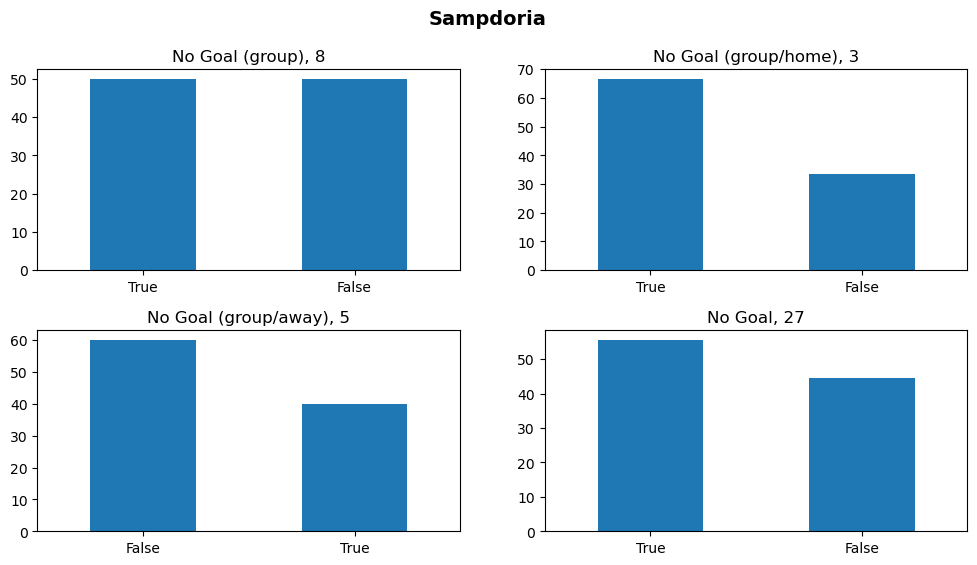

In [632]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

(team_home_df_grp.no_goal.value_counts(normalize=True) * 100).plot(kind='bar', title=f'No Goal (group), {len(team_home_df_grp)}', ax=axes[0][0], rot=0)
(team_home_df_grp[team_home_df_grp.type=='home'].no_goal.value_counts(normalize=True) * 100).plot(kind='bar', title=f'No Goal (group/home), {len(team_home_df_grp[team_home_df_grp.type=="home"])}', ax=axes[0][1], rot=0)
(team_home_df_grp[team_home_df_grp.type=='away'].no_goal.value_counts(normalize=True) * 100).plot(kind='bar', title=f'No Goal (group/away), {len(team_home_df_grp[team_home_df_grp.type=="away"])}', ax=axes[1][0], rot=0)
(team_home_df.no_goal.value_counts(normalize=True) * 100).plot(kind='bar', title=f'No Goal, {len(team_home_df)}', ax=axes[1][1], rot=0)

plt.show()

##### N° Goals

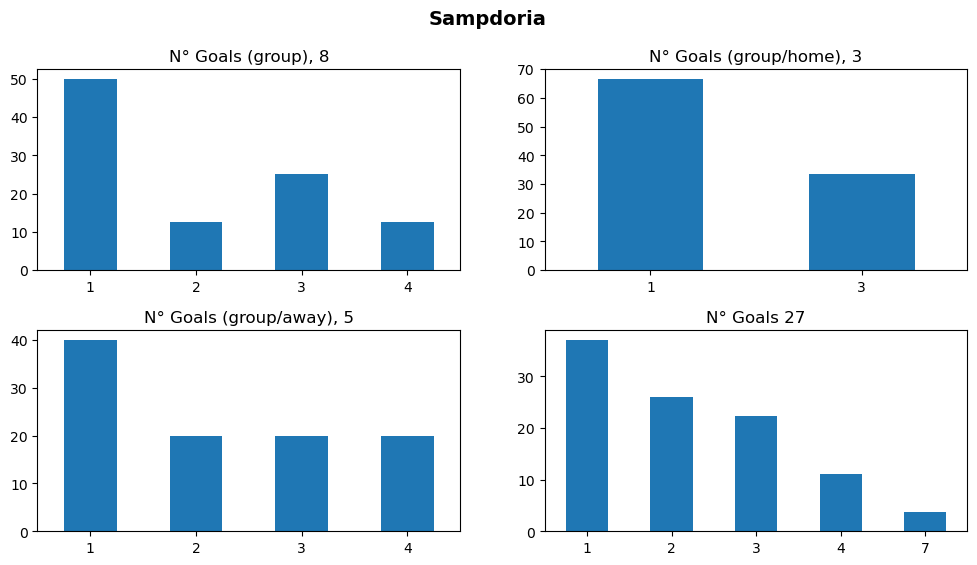

In [631]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

(team_home_df_grp['tot_goals'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'N° Goals (group), {len(team_home_df_grp)}', ax=axes[0][0], rot=0)
(team_home_df_grp[team_home_df_grp.type=='home']['tot_goals'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'N° Goals (group/home), {len(team_home_df_grp[team_home_df_grp.type=="home"])}', ax=axes[0][1], rot=0)
(team_home_df_grp[team_home_df_grp.type=='away']['tot_goals'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'N° Goals (group/away), {len(team_home_df_grp[team_home_df_grp.type=="away"])}', ax=axes[1][0], rot=0)
(team_home_df['tot_goals'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'N° Goals {len(team_home_df)}', ax=axes[1][1], rot=0)

plt.show()

##### Has scored

<Axes: title={'center': 'Has scored (Group), 8'}>

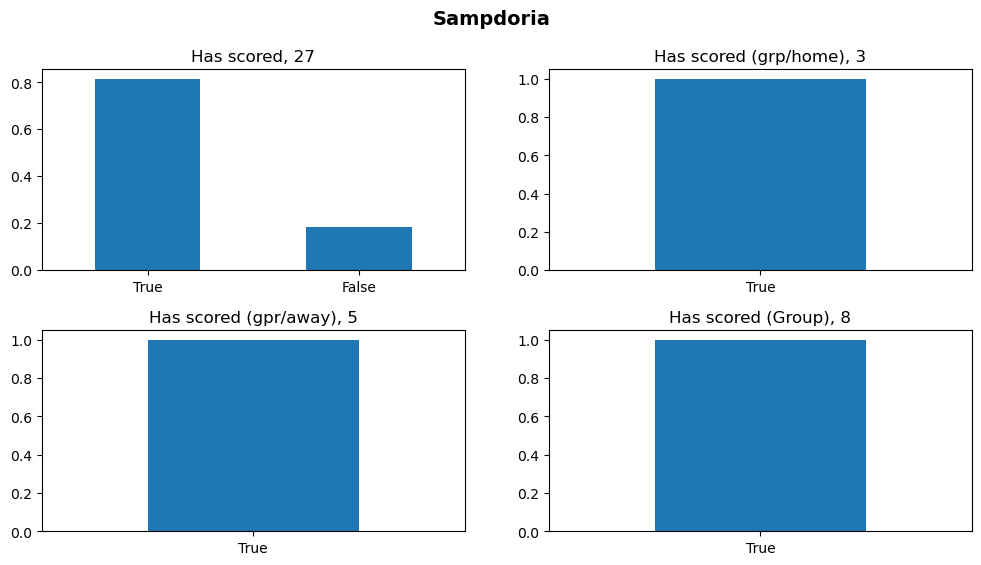

In [630]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

team_home_df.team_has_scored.value_counts(normalize=True).plot(kind='bar', rot=0, title=f'Has scored, {len(team_home_df)}', ax=axes[0][0])
team_home_df_grp[team_home_df_grp.type=='home'].team_has_scored.value_counts(normalize=True)\
                .plot(kind='bar', rot=0, title=f'Has scored (grp/home), {len(team_home_df_grp[team_home_df_grp.type=="home"])}', ax=axes[0][1])
team_home_df_grp[team_home_df_grp.type=='away'].team_has_scored.value_counts(normalize=True)\
                .plot(kind='bar', rot=0, title=f'Has scored (gpr/away), {len(team_home_df_grp[team_home_df_grp.type=="away"])}', ax=axes[1][0])
team_home_df_grp.team_has_scored.value_counts(normalize=True)\
                .plot(kind='bar', rot=0, title=f'Has scored (Group), {len(team_home_df_grp)}', ax=axes[1][1])

In [591]:
team_home_df_grp

,Team,Opponent,goal_fatti,goal_subiti,type,giornata,goal,no_goal,tot_goals,result,...,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group
0,Roma,Cremonese,1,0,home,2.0,False,True,1,Win,...,None,1,10,16,13,22,49,-27,Cremonese,2
1,Roma,Cremonese,1,2,away,24.0,True,False,3,Loss,...,None,1,10,16,13,22,49,-27,Cremonese,2
4,Roma,Lecce,2,1,home,9.0,True,False,3,Win,...,None,6,9,12,27,24,32,-8,Lecce,2
5,Roma,Lecce,1,1,away,22.0,True,False,2,Draw,...,None,6,9,12,27,24,32,-8,Lecce,2
15,Roma,Verona,1,0,home,23.0,False,True,1,Win,...,None,4,7,16,19,22,41,-19,Verona,2
16,Roma,Verona,3,1,away,12.0,True,False,4,Win,...,None,4,7,16,19,22,41,-19,Verona,2
21,Roma,Salernitana,1,0,away,1.0,False,True,1,Win,...,None,6,9,12,27,31,47,-16,Salernitana,2
24,Roma,Sampdoria,1,0,away,10.0,False,True,1,Win,...,None,3,6,18,15,16,44,-28,Sampdoria,2


##### Results

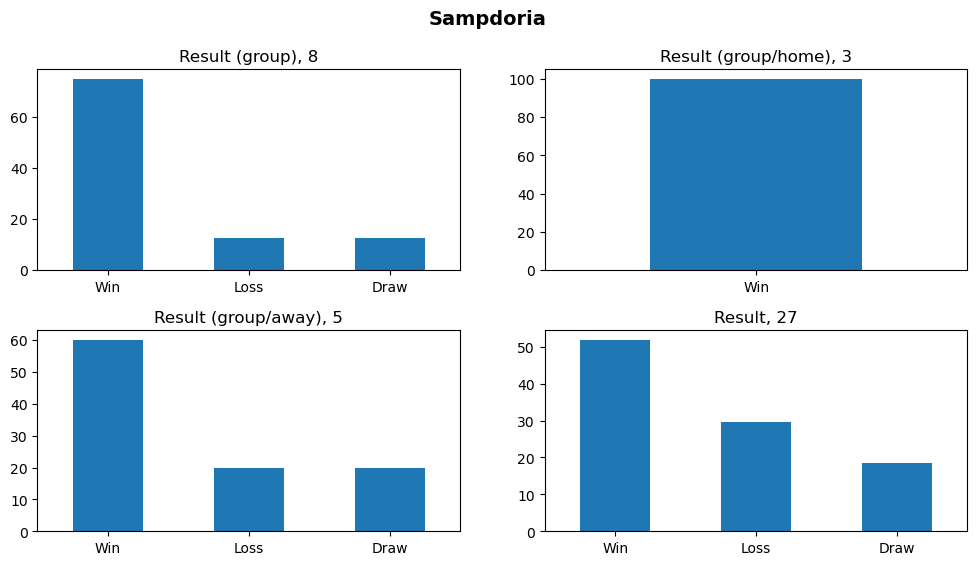

In [628]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

(team_home_df_grp.result.value_counts(normalize=True) * 100).plot(kind='bar', title=f'Result (group), {len(team_home_df_grp)}', ax=axes[0][0], rot=0)
(team_home_df_grp[team_home_df_grp.type=='home'].result.value_counts(normalize=True) * 100).plot(kind='bar', title=f'Result (group/home), {len(team_home_df_grp[team_home_df_grp.type=="home"])}', ax=axes[0][1], rot=0)
(team_home_df_grp[team_home_df_grp.type=='away'].result.value_counts(normalize=True) * 100).plot(kind='bar', title=f'Result (group/away), {len(team_home_df_grp[team_home_df_grp.type=="away"])}', ax=axes[1][0], rot=0)
(team_home_df.result.value_counts(normalize=True) * 100).plot(kind='bar', title=f'Result, {len(team_home_df)}', ax=axes[1][1], rot=0)

plt.show()

##### Result Trend

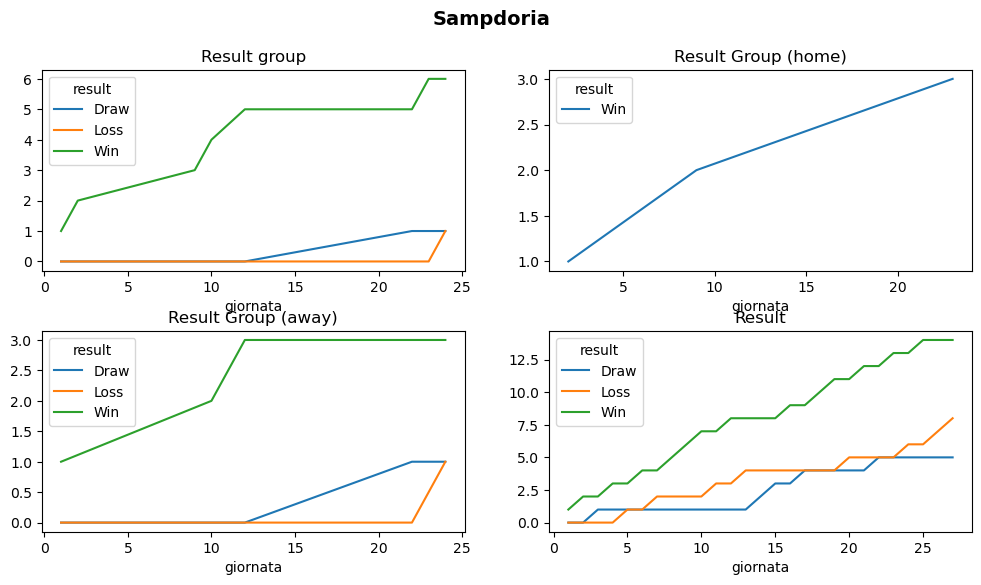

In [627]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

team_home_df_grp['value'] = 1
team_home_df['value'] = 1
team_home_df_grp[['giornata','result','value']]\
            .pivot(columns='result',index='giornata', values='value')\
            .fillna(0).cumsum().plot(kind='line', title=f"Result group", ax=axes[0][0], rot=0)
team_home_df_grp[team_home_df_grp.type=='home'][['giornata','result','value']]\
            .pivot(columns='result',index='giornata', values='value')\
            .fillna(0).cumsum().plot(kind='line', title=f"Result Group (home)", ax=axes[0][1], rot=0)
team_home_df_grp[team_home_df_grp.type=='away'][['giornata','result','value']]\
            .pivot(columns='result',index='giornata', values='value')\
            .fillna(0).cumsum().plot(kind='line', title=f"Result Group (away)", ax=axes[1][0], rot=0)
team_home_df[['giornata','result','value']]\
            .pivot(columns='result',index='giornata', values='value')\
            .fillna(0).cumsum().plot(kind='line', title=f"Result", ax=axes[1][1], rot=0)
plt.show()

In [562]:
team_home_df['team_has_scored'] = team_home_df['goal_fatti'] > 0

In [563]:
team_home_df

,Team,Opponent,goal_fatti,goal_subiti,type,giornata,goal,no_goal,tot_goals,result,value,team_has_scored
18,Roma,Cremonese,1,0,home,2.0,False,True,1,Win,1,True
32,Roma,Monza,3,0,home,4.0,False,True,3,Win,1,True
68,Roma,Atalanta,0,1,home,7.0,False,True,1,Loss,1,False
88,Roma,Lecce,2,1,home,9.0,True,False,3,Win,1,True
107,Roma,Napoli,0,1,home,11.0,False,True,1,Loss,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
185,Roma,Spezia,2,0,away,19.0,False,True,2,Win,1,True
198,Roma,Napoli,1,2,away,20.0,True,False,3,Loss,1,True
212,Roma,Lecce,1,1,away,22.0,True,False,2,Draw,1,True
238,Roma,Cremonese,1,2,away,24.0,True,False,3,Loss,1,True


#### Away Team

In [593]:
team_away_away = df[(df.AwayTeam==away_team)]
team_away_away['goal_fatti'] = team_away_away['FTAG']
team_away_away['goal_subiti'] = team_away_away['FTHG']
team_away_away['Team'] = team_away_away['AwayTeam']
team_away_away['Opponent'] = team_away_away['HomeTeam']
team_away_away['type'] = 'away'

team_away_home = df[(df.HomeTeam==away_team)]
team_away_home['goal_fatti'] = team_away_home['FTHG']
team_away_home['goal_subiti'] = team_away_home['FTAG']
team_away_home['Team'] = team_away_home['HomeTeam']
team_away_home['Opponent'] = team_away_home['AwayTeam']
team_away_home['type'] = 'home'

team_away_df = pd.concat([team_away_home[['Team','Opponent','goal_fatti','goal_subiti', 'type', 'giornata','goal','no_goal','tot_goals']],\
                        team_away_away[['Team','Opponent','goal_fatti','goal_subiti', 'type', 'giornata','goal','no_goal','tot_goals']]])
team_away_df['result'] = team_away_df.apply(get_result, axis=1)
team_away_df['team_has_scored'] = team_away_df['goal_fatti'] > 0
team_away_df

,Team,Opponent,goal_fatti,goal_subiti,type,giornata,goal,no_goal,tot_goals,result,team_has_scored
1,Sampdoria,Atalanta,0,2,home,1.0,False,True,2,Loss,False
19,Sampdoria,Juventus,0,0,home,2.0,False,True,0,Draw,False
34,Sampdoria,Lazio,1,1,home,4.0,True,False,2,Draw,True
52,Sampdoria,Milan,1,2,home,6.0,True,False,3,Loss,True
75,Sampdoria,Monza,0,3,home,8.0,False,True,3,Loss,False
...,...,...,...,...,...,...,...,...,...,...,...
179,Sampdoria,Empoli,0,1,away,18.0,False,True,1,Loss,False
194,Sampdoria,Atalanta,0,2,away,20.0,False,True,2,Loss,False
208,Sampdoria,Monza,2,2,away,21.0,True,False,4,Draw,True
237,Sampdoria,Lazio,0,1,away,24.0,False,True,1,Loss,False


In [594]:
team_away_df_grp = team_away_df.merge(standing, left_on='Opponent', right_on='team_short_name')
team_away_df_grp[team_away_df_grp.team_group == standing[standing['team_short_name']==home_team].team_group.max()]

,Team,Opponent,goal_fatti,goal_subiti,type,giornata,goal,no_goal,tot_goals,result,...,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group
0,Sampdoria,Atalanta,0,2,home,1.0,False,True,2,Loss,...,None,13,6,8,45,44,31,13,Atalanta,0
1,Sampdoria,Atalanta,0,2,away,20.0,False,True,2,Loss,...,None,13,6,8,45,44,31,13,Atalanta,0
2,Sampdoria,Juventus,0,0,home,2.0,False,True,0,Draw,...,None,17,5,5,41,45,22,23,Juventus,0
3,Sampdoria,Juventus,2,4,away,26.0,True,False,6,Loss,...,None,17,5,5,41,45,22,23,Juventus,0
4,Sampdoria,Lazio,1,1,home,4.0,True,False,2,Draw,...,None,15,7,5,52,42,19,23,Lazio,0
5,Sampdoria,Lazio,0,1,away,24.0,False,True,1,Loss,...,None,15,7,5,52,42,19,23,Lazio,0
6,Sampdoria,Milan,1,2,home,6.0,True,False,3,Loss,...,None,14,6,7,48,44,36,8,Milan,0
9,Sampdoria,Roma,0,1,home,10.0,False,True,1,Loss,...,None,14,5,8,47,35,26,9,Roma,0
12,Sampdoria,Napoli,0,2,home,17.0,False,True,2,Loss,...,None,23,2,2,71,64,16,48,Napoli,0
14,Sampdoria,Inter,0,0,home,22.0,False,True,0,Draw,...,None,16,2,9,50,47,31,16,Inter,0


##### Goal/No Goal

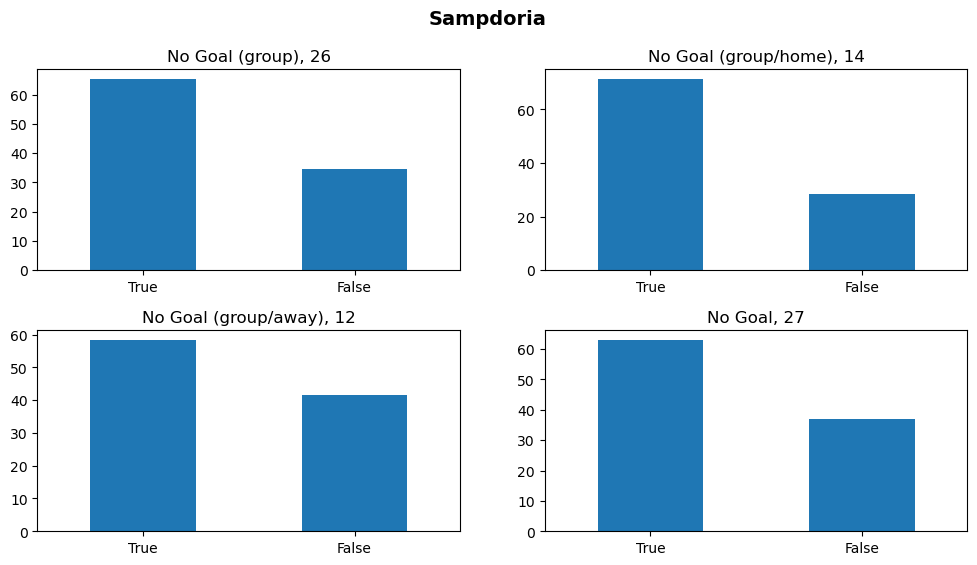

In [620]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

(team_away_df_grp.no_goal.value_counts(normalize=True) * 100).plot(kind='bar', title=f'No Goal (group), {len(team_away_df_grp)}', ax=axes[0][0], rot=0)
(team_away_df_grp[team_away_df_grp.type=='home'].no_goal.value_counts(normalize=True) * 100).plot(kind='bar', title=f'No Goal (group/home), {len(team_away_df_grp[team_away_df_grp.type=="home"])}', ax=axes[0][1], rot=0)
(team_away_df_grp[team_away_df_grp.type=='away'].no_goal.value_counts(normalize=True) * 100).plot(kind='bar', title=f'No Goal (group/away), {len(team_away_df_grp[team_away_df_grp.type=="away"])}', ax=axes[1][0], rot=0)
(team_away_df.no_goal.value_counts(normalize=True) * 100).plot(kind='bar', title=f'No Goal, {len(team_away_df)}', ax=axes[1][1], rot=0)

plt.show()

##### N° Goals

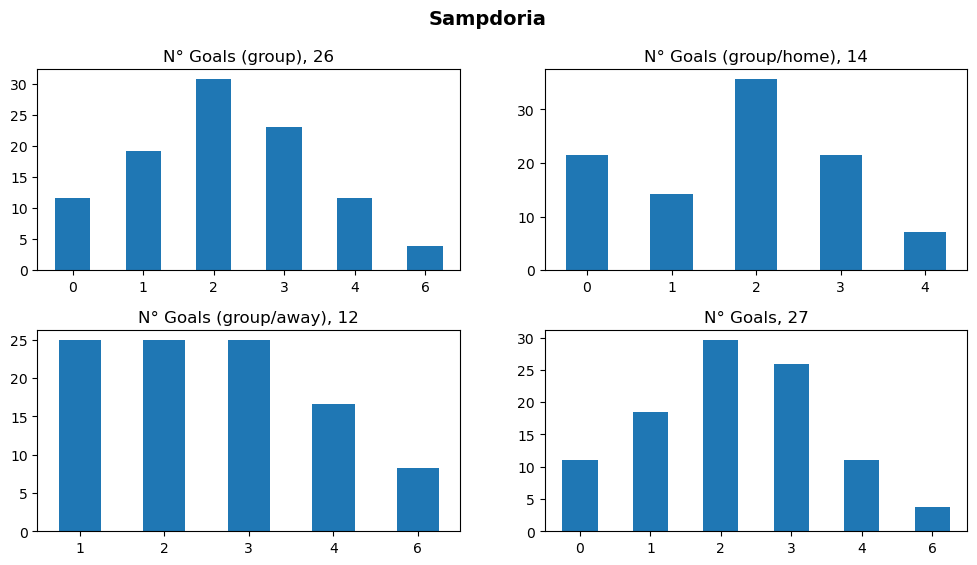

In [619]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

(team_away_df_grp['tot_goals'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'N° Goals (group), {len(team_away_df_grp)}', ax=axes[0][0], rot=0)
(team_away_df_grp[team_away_df_grp.type=='home']['tot_goals'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'N° Goals (group/home), {len(team_away_df_grp[team_away_df_grp.type=="home"])}', ax=axes[0][1], rot=0)
(team_away_df_grp[team_away_df_grp.type=='away']['tot_goals'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'N° Goals (group/away), {len(team_away_df_grp[team_away_df_grp.type=="away"])}', ax=axes[1][0], rot=0)
(team_away_df['tot_goals'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'N° Goals, {len(team_away_df)}', ax=axes[1][1], rot=0)

plt.show()

##### Has Scored

<Axes: title={'center': 'Has scored (grp), 26'}>

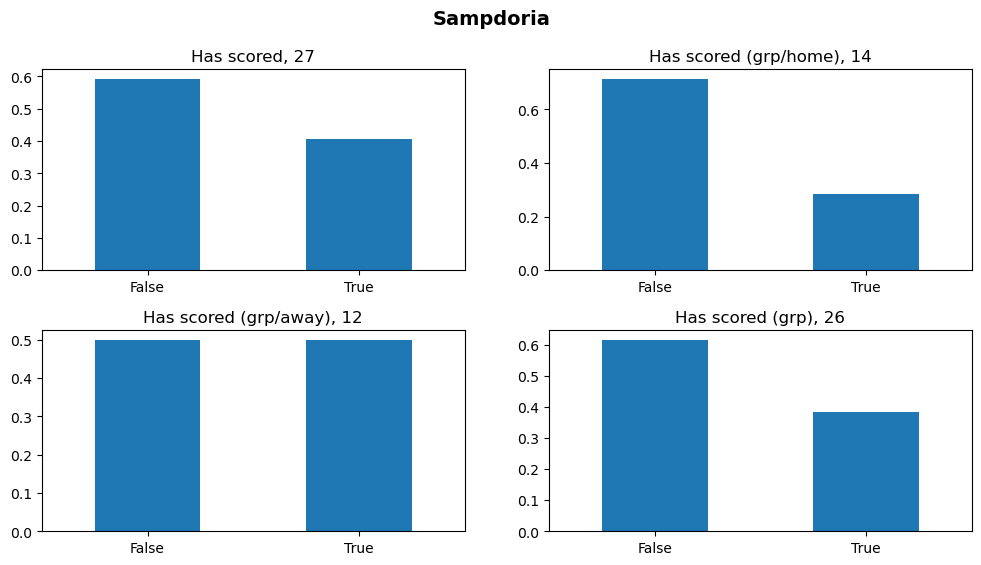

In [624]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

team_away_df.team_has_scored.value_counts(normalize=True).plot(kind='bar', title=f'Has scored, {len(team_away_df)}', ax=axes[0][0], rot=0)
team_away_df_grp[team_away_df_grp.type=='home'].team_has_scored.value_counts(normalize=True)\
                .plot(kind='bar', title=f'Has scored (grp/home), {len(team_away_df_grp[team_away_df_grp.type=="home"])}', ax=axes[0][1], rot=0)
team_away_df_grp[team_away_df_grp.type=='away'].team_has_scored.value_counts(normalize=True)\
                .plot(kind='bar', title=f'Has scored (grp/away), {len(team_away_df_grp[team_away_df_grp.type=="away"])}', ax=axes[1][0], rot=0)
team_away_df_grp.team_has_scored.value_counts(normalize=True)\
                .plot(kind='bar', title=f'Has scored (grp), {len(team_away_df_grp)}', ax=axes[1][1], rot=0)

##### Result

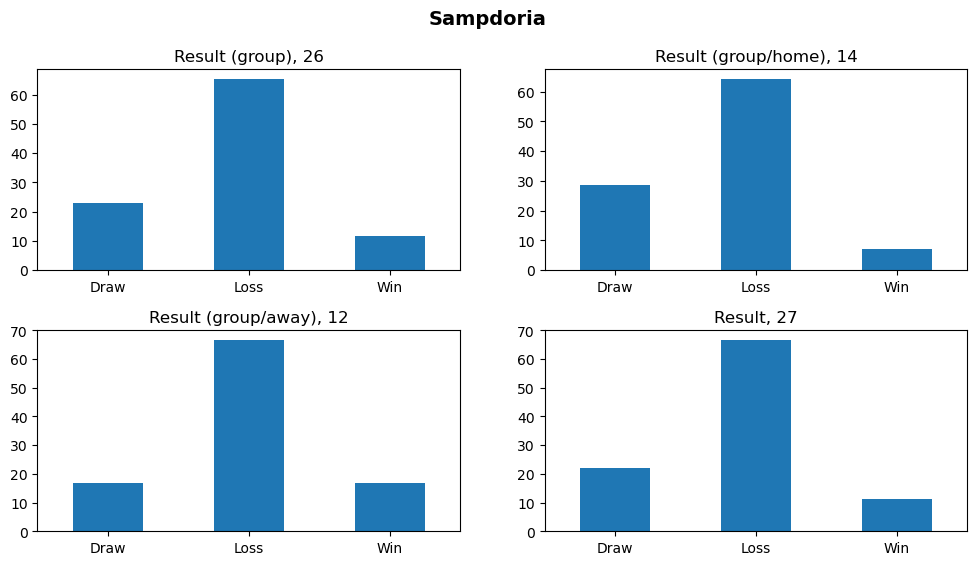

In [625]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

(team_away_df_grp['result'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'Result (group), {len(team_away_df_grp)}', ax=axes[0][0], rot=0)
(team_away_df_grp[team_away_df_grp.type=='home']['result'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'Result (group/home), {len(team_away_df_grp[team_away_df_grp.type=="home"])}', ax=axes[0][1], rot=0)
(team_away_df_grp[team_away_df_grp.type=='away']['result'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'Result (group/away), {len(team_away_df_grp[team_away_df_grp.type=="away"])}', ax=axes[1][0], rot=0)
(team_away_df['result'].value_counts(normalize=True) * 100).sort_index().plot(kind='bar', title=f'Result, {len(team_away_df)}', ax=axes[1][1], rot=0)

plt.show()

##### Result Trend

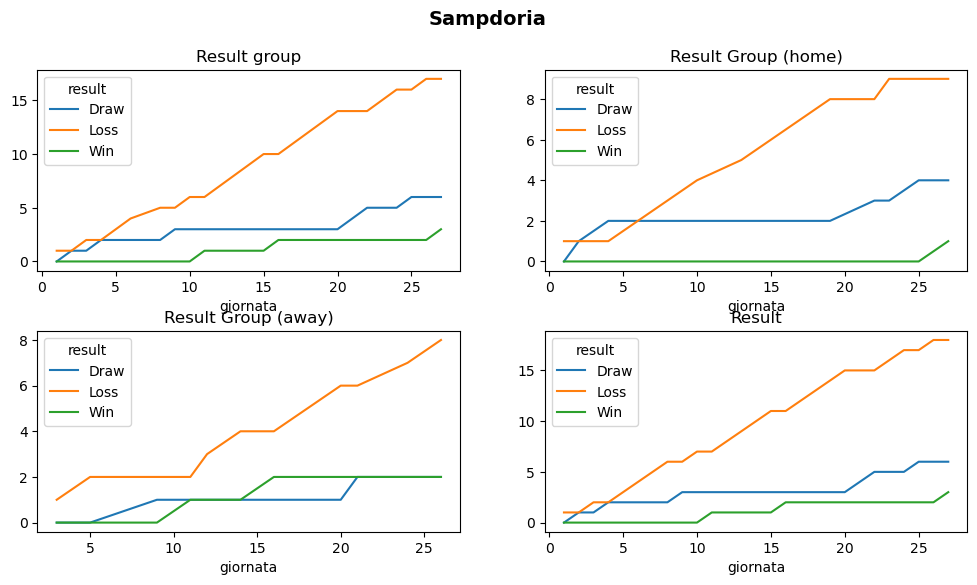

In [626]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle(f"{away_team}", fontsize=14, fontweight='bold')

team_away_df_grp['value'] = 1
team_away_df['value'] = 1
team_away_df_grp[['giornata','result','value']]\
            .pivot(columns='result',index='giornata', values='value')\
            .fillna(0).cumsum().plot(kind='line', title=f"Result group", ax=axes[0][0], rot=0)
team_away_df_grp[team_away_df_grp.type=='home'][['giornata','result','value']]\
            .pivot(columns='result',index='giornata', values='value')\
            .fillna(0).cumsum().plot(kind='line', title=f"Result Group (home)", ax=axes[0][1], rot=0)
team_away_df_grp[team_away_df_grp.type=='away'][['giornata','result','value']]\
            .pivot(columns='result',index='giornata', values='value')\
            .fillna(0).cumsum().plot(kind='line', title=f"Result Group (away)", ax=axes[1][0], rot=0)
team_away_df[['giornata','result','value']]\
            .pivot(columns='result',index='giornata', values='value')\
            .fillna(0).cumsum().plot(kind='line', title=f"Result", ax=axes[1][1], rot=0)
plt.show()

### Number of Goals

<Axes: title={'center': 'Inter'}, xlabel='row_num', ylabel='goal_subiti'>

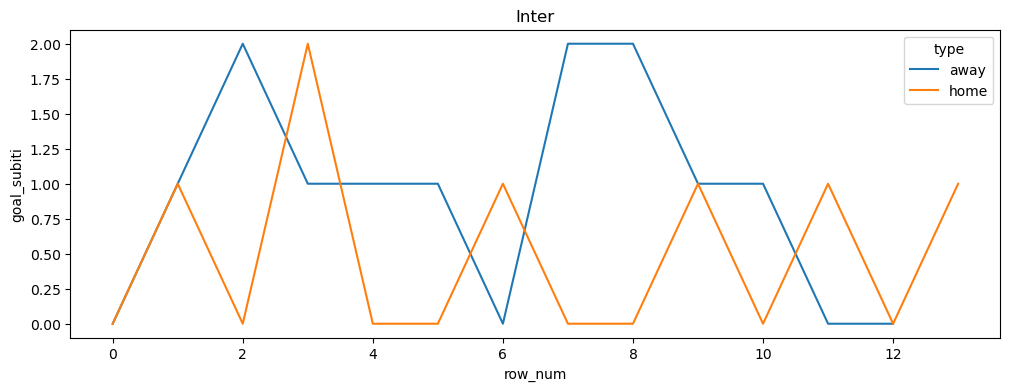

In [541]:
df_tt = pd.concat([home_sm, away_sm])
df_tt['row_num'] = df_tt.groupby('type').cumcount()
field = 'goal_subiti'
df_tt.pivot(index='row_num',columns='type',values=field).plot(kind='line', figsize=(12,4), title=team, ylabel=field)

<Axes: title={'center': 'Inter'}, xlabel='row_num', ylabel='goal_fatti'>

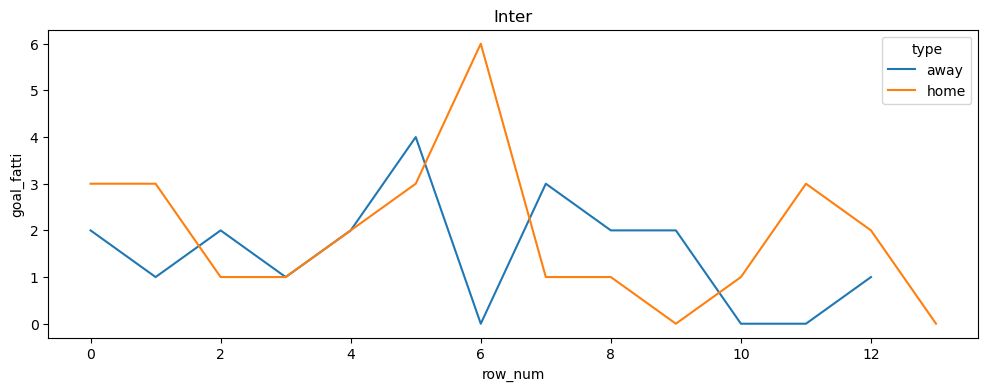

In [59]:
df_tt = pd.concat([home_sm, away_sm])
df_tt['row_num'] = df_tt.groupby('type').cumcount()
field = 'goal_fatti'
df_tt.pivot(index='row_num',columns='type',values=field).plot(kind='line', figsize=(12,4), title=team, ylabel=field)